<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Chapter_6_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จุดมุ่งหมายของการทำ Cluster Analysis คือ การจัดกลุ่มข้อมูลโดยดูจาก attributes ของข้อมูล

In [7]:
import pandas as pd

In [8]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


ตัด column สุดท้าย ที่เป็น class ของข้อมูลออก

In [9]:
example_df_drop = example_df.iloc[:,:-1]
example_df_drop

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Kmean

#### Import

In [10]:
 from sklearn.cluster import KMeans 

#### Define

In [11]:
kmeans = KMeans(random_state=2021)

#### Fit - Transform

คำนวณหาจุด cluster centers ของข้อมูล example_df_drop ด้วย วิธี K-means clustering

In [12]:
kmeans.fit(example_df_drop) # คำนวณ ด้วย fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

เเสดง จุด cluster centers ที่คำนวณออกมาได้

In [13]:
kmeans.cluster_centers_ # จุดศูนย์กลางของเเต่ละกลุ่ม

array([[5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444]])

ทดสอบการจัดกลุ่มของ Data

In [14]:
y = kmeans.predict(example_df_drop)
y

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 4, 1, 4, 1, 6, 1, 4, 6, 4, 4, 1, 4, 1,
       4, 4, 1, 4, 7, 4, 7, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 7, 4, 1, 1, 1,
       4, 4, 4, 1, 4, 6, 4, 4, 4, 1, 6, 4, 5, 7, 2, 5, 5, 2, 4, 2, 5, 2,
       5, 7, 5, 7, 7, 5, 5, 2, 2, 7, 5, 7, 2, 7, 5, 2, 7, 7, 5, 2, 2, 2,
       5, 7, 7, 2, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 7], dtype=int32)

Quiz 6 ทำ PCA ข้อมูลexample_df_dropเเล้ว plot scatter plot โดยใส่สีตามผลการทำ kmeans clustering เเล้วนำมาเทียบ กราฟ PCA - scatter ของข้อมูลจริง

#### Import

In [15]:
from sklearn.decomposition import PCA

#### Define

In [16]:
pca = PCA(n_components=2)

#### Fit - Transform

In [17]:
new_pca = pca.fit_transform(example_df_drop.to_numpy())

In [18]:
new_pca.shape

(150, 2)

In [19]:
new_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [21]:
from matplotlib import pyplot as plt

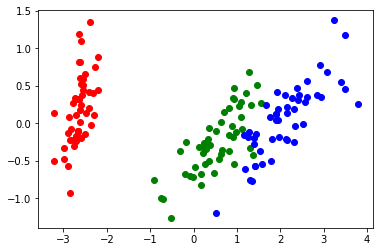

In [23]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'ob')

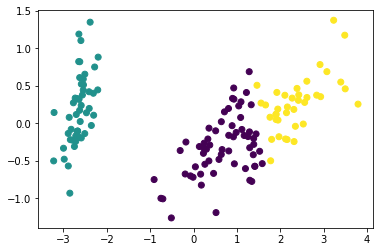

In [26]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(example_df_drop)
y = kmeans.predict(example_df_drop)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

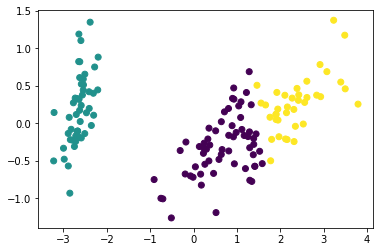

In [27]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)